In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [6]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [8]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [9]:
df = pd.concat([df,pd.get_dummies(df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df.street, prefix="street", drop_first=True).columns)

In [11]:
Y = df['saleprice']
# X is the feature set
X = df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     383.1
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:22:08   Log-Likelihood:                -13972.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1157   BIC:                         2.802e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.039e+05   2.06e+04     -5.037      0.000   -1.44e+05   -6.34e+04
overallqual  2.433e+04   1244.706     19.548      0.000    2.19e+04    2.68e+04
grlivarea      43.3745      2.745     15.800      0.000      37.988      48.760
garagecars   1.407e+04   3409.600      4.126      0.000    7379.047    2.08e+04
garagearea     17.5210     11.560      1.516      0.130      -5.161      40.203
totalbsmtsf    23.4504      3.183      7.368      0.000      17.206      29.695
mszoning_FV  1.933e+04    1.5e+04      1.289      0.198   -1.01e+04    4.88e+04
mszoning_RH  7305.5078   1.72e+04      0.426      0.670   -2.63e+04     4.1e+04
mszoning_RL  2.429e+04   1.39e+04      1.747      0.081   -2983.478    5.16e+04
mszoning_RM  2864.3070   1.41e+04      0.203      0.839   -2.48e+04    3.05e+04
street_Pave -8177.6681   1.74e+04     -0.470      0.639   -4.23e+04     2.6e+04
==============================================================================
Omnibus:                      355.774   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30190.746
Skew:                          -0.383   Prob(JB):                         0.00
Kurtosis:                      27.895   Cond. No.                     5.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

f-stat is 383.1, p-value of 0.0. AIC is 27970 and BIC is 28020. adusted R-squared value is .766. this mean that about 23.4% of the variance is unexplained by model. 

In [12]:
results = sm.OLS(y_test, X_test).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     106.7
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           1.37e-89
Time:                        16:25:56   Log-Likelihood:                -3488.9
No. Observations:                 292   AIC:                             7000.
Df Residuals:                     281   BIC:                             7040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.496e+05   3.91e+04     -3.826      0.000   -2.27e+05   -7.26e+04
overallqual  1.863e+04   2270.467      8.207      0.000    1.42e+04    2.31e+04
grlivarea      57.0255      5.589     10.202      0.000      46.023      68.028
garagecars   7870.2815   6270.270      1.255      0.210   -4472.382    2.02e+04
garagearea     13.3903     23.998      0.558      0.577     -33.849      60.629
totalbsmtsf    56.3036      7.455      7.553      0.000      41.630      70.978
mszoning_FV  2.746e+04   4.06e+04      0.677      0.499   -5.24e+04    1.07e+05
mszoning_RH  2.346e+04   4.69e+04      0.500      0.618   -6.89e+04    1.16e+05
mszoning_RL  2.682e+04   3.87e+04      0.694      0.488   -4.93e+04    1.03e+05
mszoning_RM  1.388e+04   3.89e+04      0.357      0.721   -6.26e+04    9.04e+04
street_Pave  2.837e+04   5.45e+04      0.521      0.603   -7.89e+04    1.36e+05
==============================================================================
Omnibus:                      140.286   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1377.102
Skew:                           1.697   Prob(JB):                    9.25e-300
Kurtosis:                      13.083   Cond. No.                     7.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

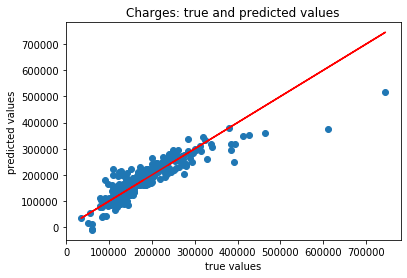

Mean absolute error of the prediction is: 25272.99915376581
Mean squared error of the prediction is: 1399006355.8490689
Root mean squared error of the prediction is: 37403.293382389056
Mean absolute percentage error of the prediction is: 15.430821928965093


In [16]:
Y_pred = results.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, Y_pred)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, Y_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, Y_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - Y_pred) / y_test)) * 100))

In [17]:
df['totalsf'] = df['totalbsmtsf'] + df['firstflrsf'] + df['secondflrsf']

df['int_over_sf'] = df['totalsf'] * df['overallqual']

In [18]:
Y = df['saleprice']
# X is the feature set
X = df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalsf', 'int_over_sf'] + dummy_column_names]

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     360.2
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:39:01   Log-Likelihood:                -13957.
No. Observations:                1168   AIC:                         2.794e+04
Df Residuals:                    1156   BIC:                         2.800e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.109e+04   2.34e+04     -1.756      0.079    -8.7e+04    4820.518
overallqual  1.471e+04   2165.277      6.791      0.000    1.05e+04     1.9e+04
grlivarea      21.4506      4.345      4.937      0.000      12.926      29.975
garagecars   1.718e+04   3418.569      5.024      0.000    1.05e+04    2.39e+04
garagearea      6.1187     11.595      0.528      0.598     -16.632      28.869
totalsf        -3.4176      5.935     -0.576      0.565     -15.062       8.227
int_over_sf     3.7145      0.694      5.350      0.000       2.352       5.077
mszoning_FV   2.59e+04   1.49e+04      1.742      0.082   -3265.992    5.51e+04
mszoning_RH  1.281e+04    1.7e+04      0.755      0.450   -2.05e+04    4.61e+04
mszoning_RL  2.891e+04   1.38e+04      2.099      0.036    1887.697    5.59e+04
mszoning_RM  6097.8997   1.39e+04      0.437      0.662   -2.13e+04    3.35e+04
street_Pave -1.094e+04   1.72e+04     -0.636      0.525   -4.47e+04    2.28e+04
==============================================================================
Omnibus:                      754.574   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95432.669
Skew:                          -2.032   Prob(JB):                         0.00
Kurtosis:                      47.096   Cond. No.                     5.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

F-stat is 360.2 with an adusted R-squared value of .772. AIC and BIC are 27940 and 28000 respectively. the f-stat is slightly lower but the adusted R-squared value is slightly higher than the rpevious model. the AIC and BIC values are also slightly less than the previous model. 

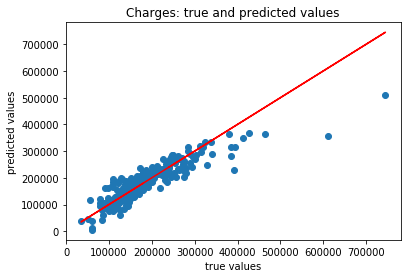

Mean absolute error of the prediction is: 24123.710865944253
Mean squared error of the prediction is: 1347017822.968204
Root mean squared error of the prediction is: 36701.74141601736
Mean absolute percentage error of the prediction is: 14.42105270587576


In [19]:
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

The 4 measurements are all slightly lower in the 2nd model. Thus, we can conclude that the 2nd model does a better ob at preducting house prices than the first. 